In [1]:
import torch
from torch import nn
import torchvision
import mine_torch 
import matplotlib.pyplot as plt

net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),#6个输出通道32*32
    #32-5+1=28
    nn.AvgPool2d(kernel_size=2, stride=2),#和核的大小一样
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))
batch_size=100
device = torch.device('cuda')
net.load_state_dict(torch.load('data\mnist.params'))
trans = torchvision.transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(
    root="./data", train=True, transform=trans, download=True)
(train_x,train_y)=mine_torch.batch_data(mnist_train,batch_size,device)

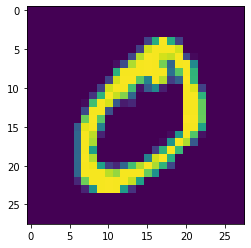

In [2]:
plt.imshow(train_x[0][1][0].cpu()*256)

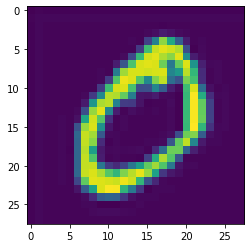

In [3]:
from PIL import Image
import os
import numpy as np

im = Image.open('pic.png')
out = im.resize((28, 28), Image.Resampling.LANCZOS)
out = out.convert('L')
out=np.array(out)/256#将图片数组化
plt.imshow(out)

In [4]:
net(train_x[0][1][0].cpu().reshape(-1,1,28,28)).argmax().item()

0

In [5]:
net(torch.tensor(out).to(torch.float32).reshape(-1,1,28,28)).argmax().item()

0

In [6]:
from PIL import ImageChops
im = Image.open('4.png')
out =   np.array(im.resize((28, 28), Image.Resampling.LANCZOS))[:,:,:3]
out=255-np.array(Image.fromarray(out).convert('L'))
